In [45]:
import random
import matplotlib.pyplot as plt
import numpy as np
from botorch.models import SingleTaskGP
from botorch.acquisition import ExpectedImprovement
from botorch.fit import fit_gpytorch_mll
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.optim import optimize_acqf
import torch

In [1]:
def visualize_colors(foreground_color, background_color):
    fig, ax = plt.subplots()
    ax.add_patch(plt.Circle((0.5, 0.5), 0.4, color=background_color))
    ax.add_patch(plt.Circle((0.5, 0.5), 0.2, color=foreground_color))
    ax.set_aspect('equal')
    ax.set_axis_off()
    plt.show()

In [8]:
def rate_contrast(foreground_color, background_color):
    visualize_colors(foreground_color, background_color)
    rating = float(input("Rate the likeness of the contrast (1-10): "))
    return rating

In [15]:
rcolor = lambda : (random.random(), random.random(), random.random())



(0.7751783418613797, 0.38703106737003423, 0.16509509693468294)

Best Color Contrast: Foreground: (0.302193346698713, 0.9843445571851583, 0.2155566518657136), Background: (0.04980883256245516, 0.0601469454150495, 0.9422500631561229)


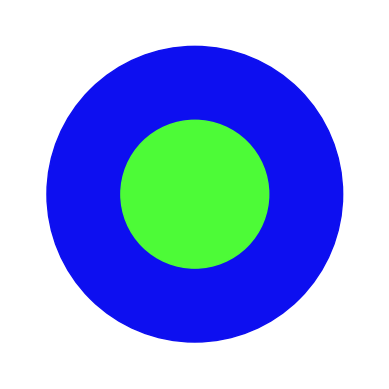

tensor([[5.]])


AttributeError: 'list' object has no attribute 'ndim'

In [47]:
# Define the optimization function
def optimize_color_contrast(iterations=10):
    best_foreground_color = rcolor()  # Initialize with default values (e.g., black)
    best_background_color = rcolor()  # Initialize with default values (e.g., white)

    for _ in range(iterations):
        # Display current best color contrast
        print(f"Best Color Contrast: Foreground: {best_foreground_color}, Background: {best_background_color}")

        # Get user rating for the current contrast
        current_rating = rate_contrast(best_foreground_color, best_background_color)

        # Create the acquisition function
        r = torch.tensor([[current_rating]])
        print(r)
        model = SingleTaskGP(torch.tensor([best_foreground_color]),r )
        mll = ExactMarginalLogLikelihood(model.likelihood, model)
        fit_gpytorch_mll(mll)
        EI = ExpectedImprovement(model, current_rating)

        # Optimize the acquisition function to get the next color contrast to be rated
        bounds = [(0, 1), (0, 1), (0, 1)]  # RGB values are between 0 and 1
        candidate, acq_value = optimize_acqf(EI, bounds=bounds, q=1, num_restarts=10, raw_samples=10)

        # Convert the candidate to RGB values
        new_foreground_color = tuple(candidate.squeeze().tolist())

        # Get user rating for the new contrast
        new_rating = rate_contrast(new_foreground_color, best_background_color)

        if new_rating > current_rating:
            best_foreground_color = new_foreground_color

    print("Optimization completed. Best color contrast:")
    print(f"Foreground: {best_foreground_color}, Background: {best_background_color}")
optimize_color_contrast()


Best Color Contrast: Foreground: (0.7425860413169797, 0.00456031590975825, 0.16589463324426013), Background: (0.5659948478535638, 0.36179182127830745, 0.032608529949085696)


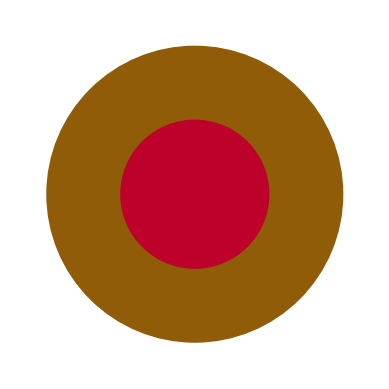

BotorchTensorDimensionError: An explicit output dimension is required for targets. Expected Y with dimension 1 (got Y.dim()=0).